In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Para estos mismos datos, emplead las implementaciones de Adaboost, LightGBM y CatBoost. 

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

In [ ]:
# Volvemos a cargar los datos sobre el accidente del titanic, uno de los datasets más utilizados en problemas de clasificación
df_train = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/modelos_supervisados/train_titanic.csv')

In [ ]:
# Algo importante a la hora de trabajar con este set de datos y con cualquier otro es mirar si tiene 
# variables categóricas (no numéricas) porque necesitamos transformarlas a numéricas para poder proporcionárselo al modelo
df_train['Embarked'].fillna(value='S',inplace=True)
df_train['Fare'].fillna(value=df_train['Fare'].mean(),inplace=True)
df_train['Age'].fillna(value=df_train['Age'].mean(),inplace=True)

In [ ]:
sex_categories = {'female':0,'male':1}
# Vamos a utilizar la función map para transformar las variable del sexo del pasajero a numérica
df_train['Sex'] = df_train['Sex'].map(sex_categories)

In [ ]:
# Para el puerto de embarque,vamos a utilzar una técnica que se llama one-hot encoding
one_hot_encoding_train = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, one_hot_encoding_train], axis=1)
df_train= df_train.drop(['Embarked'],axis=1)

In [ ]:
# Vamos a eliminar las columnas que no nos interesan
df_train = df_train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'PassengerId'], axis=1)

In [ ]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived'], test_size=0.2, stratify=df_train['Survived'],random_state=123)

In [ ]:
# vamos a crear nuestra instancia del modelo
adab = AdaBoostClassifier()

In [ ]:
# Entrenamos el modelo con el set de datos de entrenamiento
adab.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Podemos generar predicciones para el set de pruebas
y_predict = adab.predict(X_test)

In [ ]:
# ahora vamos a ver qué tal lo ha hecho el modelo AdaBoost
pred_proba = adab.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8388010540184453

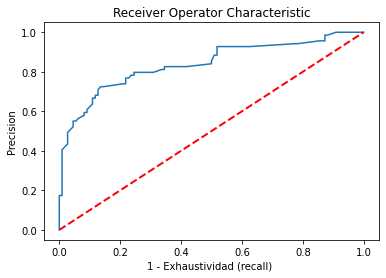

In [ ]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [ ]:
# Otras métrica que podemos sacar son la matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[98 12]
 [23 46]]


In [ ]:
# Scikit-learn también nos permite calcular fácilmente otras métricas como el F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
features = X_train
feature_list = X_train.columns

# Guardamos los valores numéricos de la importancia de cada feature
importances = list(adab.feature_importances_)

# Vamos a crear un lista de tuplas con la variable independiente de entrada y su importancia
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ordenamos las importancias de las variables para tener las más importantes al principio
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostramos las variables y sus importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.7
Variable: Pclass               Importance: 0.1
Variable: SibSp                Importance: 0.08
Variable: Parch                Importance: 0.06
Variable: Sex                  Importance: 0.04
Variable: S                    Importance: 0.02
Variable: C                    Importance: 0.0
Variable: Q                    Importance: 0.0


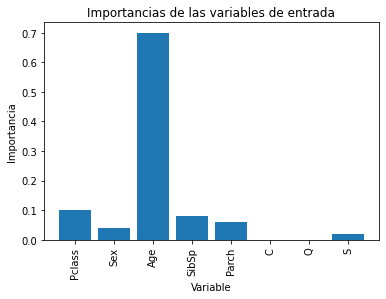

In [ ]:
# También podemos tener una representación gráfica
# creamos una lista con tantas variables como vayamos a pintar
x_values = list(range(len(importances)))

# Creamos un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Ponemos los nombres de las variables en el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
# Ponemos los nombres de los ejes y el título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancias de las variables de entrada'); 

##LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

In [ ]:
# Volvemos a cargar los datos sobre el accidente del titanic, uno de los datasets más utilizados en problemas de clasificación
df_train = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/modelos_supervisados/train_titanic.csv')

In [ ]:
# Algo importante a la hora de trabajar con este set de datos y con cualquier otro es mirar si tiene 
# variables categóricas (no numéricas) porque necesitamos transformarlas a numéricas para poder proporcionárselo al modelo
df_train['Embarked'].fillna(value='S',inplace=True)
# df_train['Fare'].fillna(value=df_train['Fare'].mean(),inplace=True)
df_train['Age'].fillna(value=df_train['Age'].mean(),inplace=True)

In [ ]:
sex_categories = {'female':0,'male':1}
# Vamos a utilizar la función map para transformar las variable del sexo del pasajero a numérica
df_train['Sex'] = df_train['Sex'].map(sex_categories)

In [ ]:
# Para el puerto de embarque,vamos a utilzar una técnica que se llama one-hot encoding
one_hot_encoding_train = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, one_hot_encoding_train], axis=1)
df_train= df_train.drop(['Embarked'],axis=1)

In [ ]:
# Vamos a eliminar las columnas que no nos interesan
df_train = df_train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'PassengerId'], axis=1)

In [ ]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived'], test_size=0.2, stratify=df_train['Survived'],random_state=123)

In [ ]:
# vamos a crear nuestra instancia del modelo
clf = lgb.LGBMClassifier()

In [ ]:
# Entrenamos el modelo con el set de datos de entrenamiento
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# Podemos generar predicciones para el set de pruebas
y_predict = clf.predict(X_test)

In [ ]:
# ahora vamos a ver qué tal lo ha hecho el modelo lightgbm
pred_proba = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8449275362318841

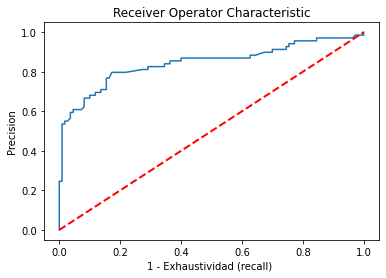

In [ ]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [ ]:
# Otras métrica que podemos sacar son la matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[93 17]
 [19 50]]


In [ ]:
# Scikit-learn también nos permite calcular fácilmente otras métricas como el F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##CatBoost

In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

In [ ]:
# Volvemos a cargar los datos sobre el accidente del titanic, uno de los datasets más utilizados en problemas de clasificación
df_train = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/Apuntes/semana_8/modelos_supervisados/train_titanic.csv')

In [ ]:
# Algo importante a la hora de trabajar con este set de datos y con cualquier otro es mirar si tiene 
# variables categóricas (no numéricas) porque necesitamos transformarlas a numéricas para poder proporcionárselo al modelo
df_train['Embarked'].fillna(value='S',inplace=True)
# df_train['Fare'].fillna(value=df_train['Fare'].mean(),inplace=True)
df_train['Age'].fillna(value=df_train['Age'].mean(),inplace=True)

In [ ]:
sex_categories = {'female':0,'male':1}
# Vamos a utilizar la función map para transformar las variable del sexo del pasajero a numérica
df_train['Sex'] = df_train['Sex'].map(sex_categories)

In [ ]:
# Para el puerto de embarque,vamos a utilzar una técnica que se llama one-hot encoding
one_hot_encoding_train = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, one_hot_encoding_train], axis=1)
df_train= df_train.drop(['Embarked'],axis=1)

In [ ]:
# Vamos a eliminar las columnas que no nos interesan
df_train = df_train.drop(['Name', 'Cabin', 'Ticket', 'Fare', 'PassengerId'], axis=1)

In [ ]:
# Antes de crear el modelo hacemos la separación del set de entrenamiento y el set de pruebas
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived'], test_size=0.2, stratify=df_train['Survived'],random_state=123)

In [ ]:
# vamos a crear nuestra instancia del modelo
clf = CatBoostClassifier()
# clf = CatBoostClassifier(iterations=25, learning_rate=0.1)

In [ ]:
# Entrenamos el modelo con el set de datos de entrenamiento
clf.fit(X_train, y_train)

In [ ]:
# Podemos generar predicciones para el set de pruebas
y_predict = clf.predict(X_test)

In [ ]:
# ahora vamos a ver qué tal lo ha hecho el modelo Catboost
pred_proba = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.8662714097496707

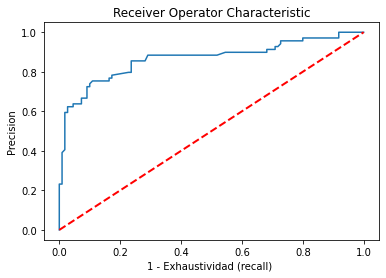

In [ ]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [ ]:
# Otras métrica que podemos sacar son la matriz de confusión del modelo
print(confusion_matrix(y_test, y_predict))

[[100  10]
 [ 19  50]]


In [ ]:
# Scikit-learn también nos permite calcular fácilmente otras métricas como el F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
features = X_train
feature_list = X_train.columns

# Guardamos los valores numéricos de la importancia de cada feature
importances = list(clf.feature_importances_)

# Vamos a crear un lista de tuplas con la variable independiente de entrada y su importancia
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ordenamos las importancias de las variables para tener las más importantes al principio
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostramos las variables y sus importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Sex                  Importance: 37.2539
Variable: Age                  Importance: 24.3743
Variable: Pclass               Importance: 19.8275
Variable: SibSp                Importance: 8.7224
Variable: Parch                Importance: 4.1753
Variable: S                    Importance: 2.5343
Variable: C                    Importance: 1.8985
Variable: Q                    Importance: 1.2137


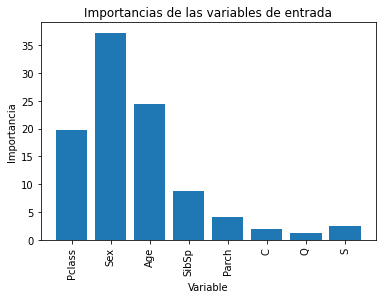

In [ ]:
# También podemos tener una representación gráfica
# creamos una lista con tantas variables como vayamos a pintar
x_values = list(range(len(importances)))

# Creamos un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Ponemos los nombres de las variables en el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
# Ponemos los nombres de los ejes y el título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancias de las variables de entrada'); 